In [1]:
# import from

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import folium
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
fruits = pd.read_csv('../Data/fruites.csv')

### Feature Set과 Target Set을 Numpy Array로 변경

In [3]:
testA = np.array([1,2,3,4])
testB = np.array([10,20,30,40])

In [4]:
# 2개의 Array를 묶어서 Column기반의 하나의 array로 만들기
combineA = [[i,j] for i, j in zip(testA, testB)]
np.array(combineA)

array([[ 1, 10],
       [ 2, 20],
       [ 3, 30],
       [ 4, 40]])

In [5]:
combineB = np.column_stack((testA,testB))
combineB

array([[ 1, 10],
       [ 2, 20],
       [ 3, 30],
       [ 4, 40]])

In [6]:
combineC = np.row_stack((testA,testB))
combineC

array([[ 1,  2,  3,  4],
       [10, 20, 30, 40]])

In [10]:
fruits_data = np.column_stack((fruits.length,fruits.weight))
fruits_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [11]:
fruits_target = np.array(fruits.name)
fruits_target

array(['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'berry', 'berry', 'berry', 'berry', 'berry', 'berry', 'berry',
       'berry', 'berry', 'berry', 'berry', 'berry', 'berry', 'berry'],
      dtype=object)

In [12]:
# train과 test 분리
from sklearn.model_selection import train_test_split

In [13]:
train_input, test_input, train_target, test_target = train_test_split( ## 이거 순서 맞춰줘야 함 앞에 input2개가 fruits_data, 뒤에 target2개가 
    fruits_data,
    fruits_target,
    stratify=fruits_target,
    random_state=42
)

In [14]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input,test_target)

1.0

---
### 수상한 과일?

In [17]:
kn.predict([[25,150]])

array(['berry'], dtype=object)

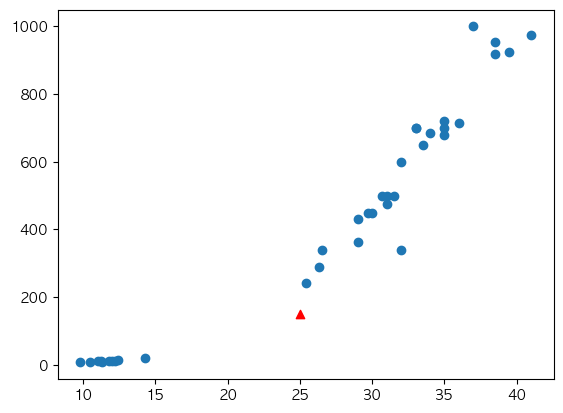

In [20]:
#오... 25 150이 berry야 ..? 그래프로 함 봐보자
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150, marker='^',c='red')
plt.show()

### 이웃을 출력해보자

In [23]:
distances, indexes = kn.kneighbors([[25,150]])
# print(distances)
print(indexes)

[[11 20 13 22 15]]


In [24]:
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 14.3,  19.7],
        [ 12.4,  13.4],
        [ 12.2,  12.2],
        [ 26.3, 290. ]]])

In [26]:
train_target[indexes]

array([['apple', 'berry', 'berry', 'berry', 'apple']], dtype=object)

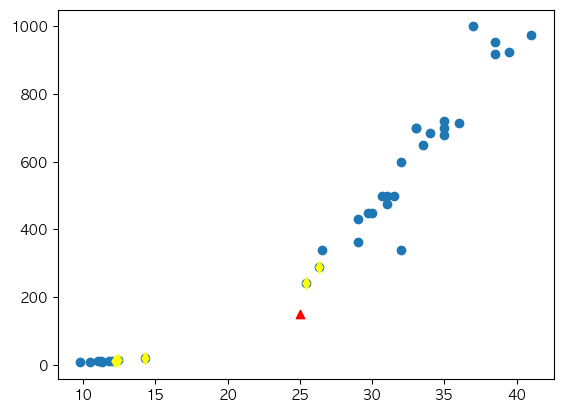

In [29]:
#오... 25 150이 berry야 ..? 그래프로 함 봐보자
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150, marker='^',c='red')
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker='d',c='yellow')
plt.show()

그림으로 보면 apple 같은데 berry가 이웃이 3 apple이 2 이네..?
### 기준을 맞춰보자

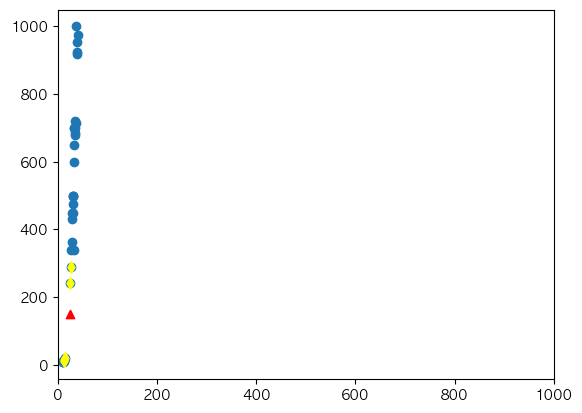

In [30]:
#오... 25 150이 berry야 ..? 그래프로 함 봐보자
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150, marker='^',c='red')
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker='d',c='yellow')
plt.xlim(0,1000)

plt.show()

오 .... 이렇게 보면 또 맞는거 같기도 하고 ..?
이렇게 x,y축을 같은 값으로 넣고 보면 lentgh엔 영향이 거의 없고 weight의 영향을 크게 받나보구나!
라고 끝내면 말이 안됨!!

아무리 생각해봐도 berry는 아닌거 같아, 근데 berry래 그래서 정교한 결과가 나오도록 해야댐

In [31]:
# length와 weight의 평균과 표준편차를 구해서 비교해보자

mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean,std)

[ 26.93333333 441.98333333] [ 10.09141549 325.61300692]


--- 
### train_data 를 표준점수(Z점수) 로 변경하자
표준점수 = (Feature - 평균) / 표준편차   
(변동계수)

In [32]:
train_scaled = (train_input - mean) / std
train_scaled

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137],
       [ 1.14618873,  1.46805151],
       [-1.49962444, -1.32698425],
       [ 0.50207691,  0.48528979],
       [-1.47980562, -1.32729137],
       [ 0.89845341,  0.83539865],
       [ 0.60117103,  0.79240283],
       [-0.15194433, -0.61417489],
       [ 0.99754754,  1.71374194],
       [-1.44016797, -1.3162353 ],
       [-1.69781269, -1.33681187],
       [-0.06275961, -0.46676063],
       [ 0.79935928,  0.73098022],
       [ 0.40298278,  0.17817675],
       [-1.57889974, -1.32759848],
       [ 0.27416042,  0.02462023],
       [-1.25188913, -1.29688718],
       [ 0.79935928,  0.79240283],
       [-1.45998679, -1.31992065],
       [ 0.45252984,  0.17817675],
       [ 1.39392404,  1.63696368],
       [ 0.6507181 ,  0.63884631],
       [ 0.60117103,  0.79240283],
       [-1.62844681, -1.33435497],
       [-0.04294079,

In [34]:
# sklean 함수
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
scaler.fit(train_input)
train_scaled = scaler.transform(train_input)
train_scaled

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137],
       [ 1.14618873,  1.46805151],
       [-1.49962444, -1.32698425],
       [ 0.50207691,  0.48528979],
       [-1.47980562, -1.32729137],
       [ 0.89845341,  0.83539865],
       [ 0.60117103,  0.79240283],
       [-0.15194433, -0.61417489],
       [ 0.99754754,  1.71374194],
       [-1.44016797, -1.3162353 ],
       [-1.69781269, -1.33681187],
       [-0.06275961, -0.46676063],
       [ 0.79935928,  0.73098022],
       [ 0.40298278,  0.17817675],
       [-1.57889974, -1.32759848],
       [ 0.27416042,  0.02462023],
       [-1.25188913, -1.29688718],
       [ 0.79935928,  0.79240283],
       [-1.45998679, -1.31992065],
       [ 0.45252984,  0.17817675],
       [ 1.39392404,  1.63696368],
       [ 0.6507181 ,  0.63884631],
       [ 0.60117103,  0.79240283],
       [-1.62844681, -1.33435497],
       [-0.04294079,

### 전처리 데이터로 모델 훈련하기

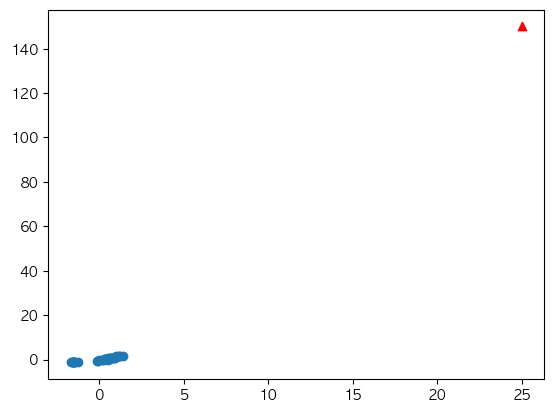

In [36]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25,150, marker='^', c='red') # << 그냥은 못쓰지! 얘도 표준점수로 바꿔야 겠고만
plt.show()

In [52]:
# 예측할 데이터도 표준점수로 변경
new = ([25,150]-mean)/std
new

array([-0.19158198, -0.89671889])

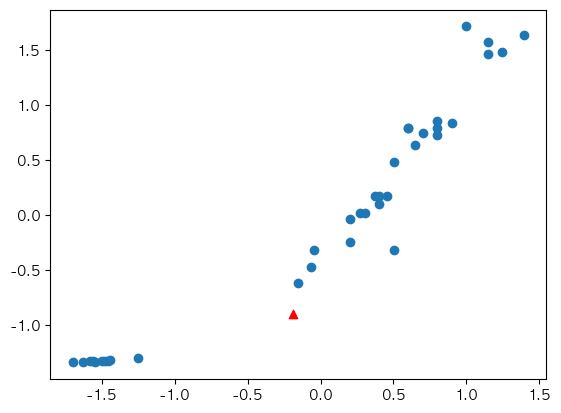

In [53]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker='^', c='red') # << 그냥은 못쓰지! 얘도 표준점수로 바꿔야 겠고만
plt.show()

###
KNN

In [43]:
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std # << 여기 mean 과 std를 test에서 따로 구해서 해버리면 데이터 A,B로 걍 나뉘어져버림
#>>> *** !!!! train의 mean 과 std로 그대로 test에서 사용해야함!!!! ***** <<<

In [45]:
kn.score(test_scaled, test_target)

1.0

In [47]:
kn.predict([new]) # 오 답이 바뀌었어 

array(['apple'], dtype=object)

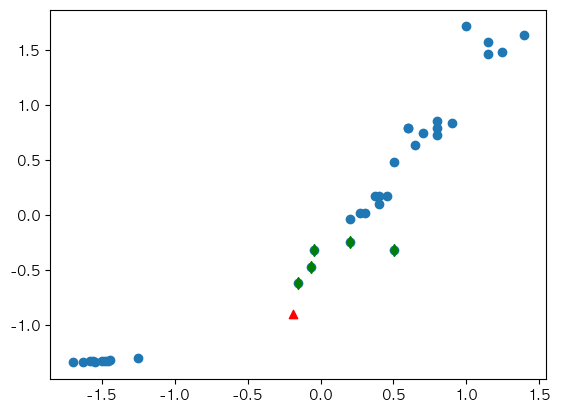

In [54]:
# 확인을 위해 이웃을 출력하자
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1], marker='^',c='red')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1], marker='d', c='green')
plt.show()